In [1]:
# load_digits dataset, which is a collection of 8x8 images (64 features)of digits. The dataset contains a total of 1797 sample points.
from sklearn.datasets import load_digits
digits = load_digits()

<Figure size 432x288 with 0 Axes>

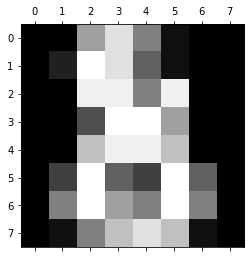

In [2]:
#visualize the  image of the handwritten digits stored in images
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[1796]) 
plt.show()


In [3]:
# retrive the label of image
digits.target[1796]

8

In [4]:
#list all of the labels
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
#Importing Relevant Libraries & Modules

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [6]:
#prepare the data for training by declaring a NumPy array data and reshaping it so that it has the first dimension equal to the length of the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [7]:
#Splitting Data into Train and Test 50% training and 50% testing data
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.3, shuffle=False)

In [8]:
#Classification Report will give us the precision, recall, f1-score, support, and accuracy
#the Confusion Matrix will show us the number of True Positives, False Positives, and False Negatives for each Classifier
# We will use the following classifiers from Sklearn:
# Support Vector Machine
# Gaussian Naive Bayes
# Decision Trees
# Random Forest
# K Nearest Neighbours
# Stochastic Gradient Descent

In [9]:
def classification_report(predicted,classifier):
  _, axes = plt.subplots(2, 4)
  images_and_labels = list(zip(digits.images, digits.target))
  for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
      ax.set_axis_off()
      ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
      ax.set_title('Training: %i' % label)
      
  images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
  for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
      ax.set_axis_off()
      ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
      ax.set_title('Prediction: %i' % prediction)
  print("\nClassification report for classifier %s:\n%s\n" % (classifier, metrics.classification_report(y_test, predicted)))
  disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
  disp.figure_.suptitle("Confusion Matrix")
  print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
  print("\nAccuracy of the Algorithm: ", classifier.score(X_test, y_test))
  plt.show()



Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        53
           2       1.00      0.98      0.99        53
           3       0.96      0.89      0.92        53
           4       0.98      0.95      0.96        57
           5       0.95      0.98      0.96        56
           6       0.98      0.98      0.98        54
           7       1.00      1.00      1.00        54
           8       0.91      0.98      0.94        52
           9       0.96      0.96      0.96        55

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



Confusion matrix:
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 53  0  0  0  0  0  0  0  0]
 [ 0  0 52  1  0  0  0  0  0  0]
 [ 0  0  0 47  0  2  0  0  4  0]
 [ 0  0  0  0 54  0  0  0  1  2]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


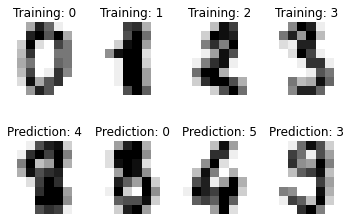

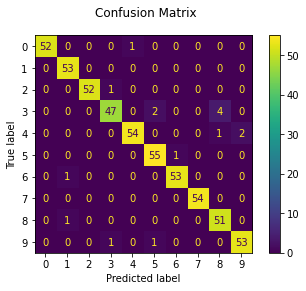

In [10]:
#1. Support Vector Machines (SVM)
from sklearn import svm
svm_classifier = svm.SVC(gamma=0.001)
svm_classifier.fit(X_train, y_train)
predicted_svm = svm_classifier.predict(X_test)
classification_report(predicted_svm,svm_classifier)



Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.65      0.79      0.71        53
           2       0.98      0.81      0.89        53
           3       0.92      0.64      0.76        53
           4       1.00      0.86      0.92        57
           5       0.83      0.93      0.87        56
           6       0.96      0.98      0.97        54
           7       0.73      0.83      0.78        54
           8       0.59      0.71      0.64        52
           9       0.82      0.73      0.77        55

    accuracy                           0.83       540
   macro avg       0.84      0.82      0.83       540
weighted avg       0.84      0.83      0.83       540



Confusion matrix:
[[51  0  0  0  0  0  0  0  2  0]
 [ 0 42  1  0  0  0  0  0  3  7]
 [ 0  5 43  1  0  0  1  0  1  2]
 [ 0  3  0 34  0  3  0  2 11  0]
 [ 1  0  0  0 49  0  0  6  1  0]
 [ 0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


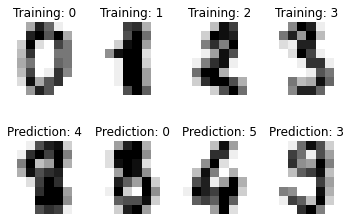

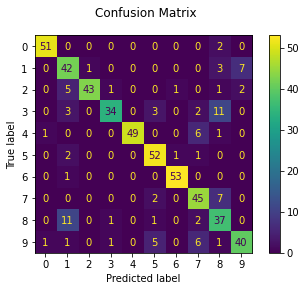

In [11]:
#2. Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
GNB_classifier = GaussianNB()
GNB_classifier.fit(X_train, y_train)
predicted_GNB = GNB_classifier.predict(X_test)
classification_report(predicted_GNB,GNB_classifier)



Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        53
           1       0.80      0.68      0.73        53
           2       0.73      0.72      0.72        53
           3       0.77      0.64      0.70        53
           4       0.91      0.84      0.87        57
           5       0.80      0.86      0.83        56
           6       0.84      0.91      0.88        54
           7       0.93      0.96      0.95        54
           8       0.71      0.58      0.64        52
           9       0.61      0.85      0.71        55

    accuracy                           0.79       540
   macro avg       0.80      0.79      0.79       540
weighted avg       0.80      0.79      0.79       540



Confusion matrix:
[[46  0  5  0  0  0  0  0  0  2]
 [ 0 36  3  1  1  0  1  0  1 10]
 [ 2  2 38  5  0  0  3  0  1  2]
 [ 0  1  2 34  0  4  0  1  7  4]
 [ 2  0  1  0 48  0  2  1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


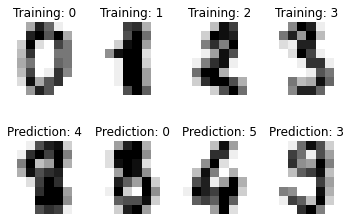

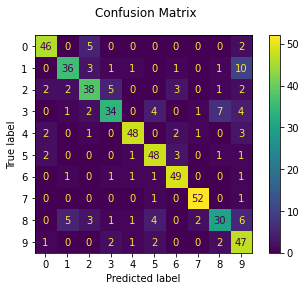

In [12]:
# 3. Decision Trees
from sklearn import tree
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
predicted_dt = dt_classifier.predict(X_test)
classification_report(predicted_dt,dt_classifier)



Classification report for classifier RandomForestClassifier(max_depth=2, random_state=0):
              precision    recall  f1-score   support

           0       0.88      0.98      0.93        53
           1       0.73      0.66      0.69        53
           2       0.79      0.77      0.78        53
           3       0.66      0.74      0.70        53
           4       0.88      0.81      0.84        57
           5       0.88      0.79      0.83        56
           6       0.85      0.98      0.91        54
           7       0.64      1.00      0.78        54
           8       0.94      0.31      0.46        52
           9       0.79      0.80      0.79        55

    accuracy                           0.79       540
   macro avg       0.80      0.78      0.77       540
weighted avg       0.80      0.79      0.77       540



Confusion matrix:
[[52  0  0  0  1  0  0  0  0  0]
 [ 1 35  1  2  2  1  0  5  0  6]
 [ 1  0 41  9  0  0  0  2  0  0]
 [ 0  1  6 39  0  2  0  4  1  0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


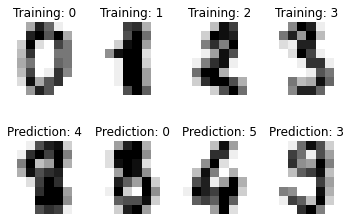

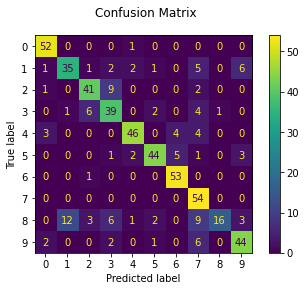

In [13]:
#4. Random Forest
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(max_depth=2, random_state=0)
RF_classifier.fit(X_train, y_train)
predicted_RF = RF_classifier.predict(X_test)
classification_report(predicted_RF,RF_classifier)



Classification report for classifier KNeighborsClassifier(metric='euclidean'):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.95      0.98      0.96        53
           2       0.98      0.96      0.97        53
           3       0.96      0.92      0.94        53
           4       0.98      0.96      0.97        57
           5       0.95      0.98      0.96        56
           6       0.98      1.00      0.99        54
           7       0.95      1.00      0.97        54
           8       0.96      0.90      0.93        52
           9       0.96      0.95      0.95        55

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.97      0.96      0.96       540



Confusion matrix:
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 52  0  0  0  0  0  0  0  1]
 [ 1  0 51  1  0  0  0  0  0  0]
 [ 0  0  1 49  0  1  0  1  1  0]
 [ 0  0  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


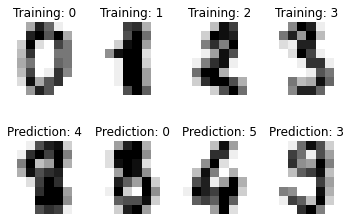

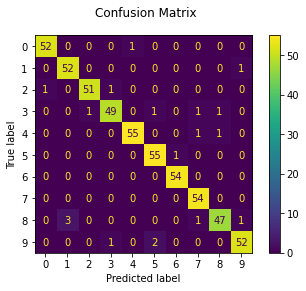

In [14]:
#5. K Nearest Neighbours (KNN)
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
KNN_classifier.fit(X_train, y_train)
predicted_KNN = KNN_classifier.predict(X_test)
classification_report(predicted_KNN,KNN_classifier)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Classification report for classifier SGDClassifier(max_iter=5):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        53
           1       0.95      0.66      0.78        53
           2       0.98      0.98      0.98        53
           3       0.93      0.75      0.83        53
           4       0.91      0.93      0.92        57
           5       0.89      0.96      0.92        56
           6       0.95      1.00      0.97        54
           7       0.96      0.89      0.92        54
           8       0.69      0.87      0.77        52
           9       0.77      0.87      0.82        55

    accuracy                           0.89       540
   macro avg       0.90      0.89      0.89       540
weighted avg       0.90      0.89      0.89       540



Confusion matrix:
[[51  0  0  0  1  0  1  0  0  0]
 [ 0 35  0  2  1  0  0  0  5 10]
 [ 1  0 52  0  0  0  0  0  0  0]
 [ 0  1  0 40  0  3  0  2  7  0]
 [ 0  0  0  0 53  0  1  

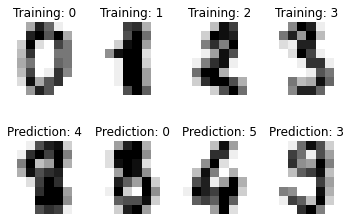

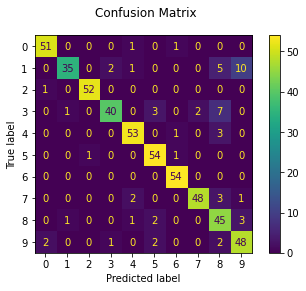

In [15]:
#6. Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
sgd_classifier.fit(X_train, y_train)
predicted_sgd = sgd_classifier.predict(X_test)
classification_report(predicted_sgd,sgd_classifier)
